#### Logistic Regression using Newton's method as the minimization technique
Newton's Method: ${\theta = \theta - \frac{f'(\theta)} {f''(\theta)}}$ , where ${f(\theta) = \sum{y^{i} * h(\theta) + (1 - y^{i}) * (1 - h(\theta))}}$ and finally ${h(\theta) = \sigma(\theta'x) = \frac{1}{1 + e^{-\theta'x}}}$

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math

In [4]:
datax = np.loadtxt('q1x.dat.txt')
y = np.loadtxt('q1y.dat.txt')

# no of training examples
m = y.shape[0]
X = np.concatenate((np.ones((m, 1)), datax), axis=1)
# number of dimensions
n = X.shape[1]

In [21]:
def H(X, W):
    xw = X.dot(W)
    return 1.0 / (1 + np.exp(-xw))

In [22]:
def CalcObj(X, Y, W):
    return Y.dot(np.log(H(X, W))) + (1 - Y).dot(np.log(1 - H(X, W)))

In [23]:
def Grad(X, Y, W):
    return (Y - H(X, W)).dot(X)

In [24]:
def Hessian(X, W):
    # First Upscale the hypothesis and the 1 - hypothesis actually convert them into diagonal matrices
    H_mat = H(X,W) * np.eye(X.shape[0])
    H1_mat = (1 - H(X, W)) * np.eye(X.shape[0])
    term1 = X.T.dot(H_mat)
    term2 = H1_mat.dot(X)
    return (-1)*term1.dot(term2)

In [25]:
def update_params(X, Y, W):
    hessian = Hessian(X, W)
    grad = Grad(X, Y, W)
    return W - np.linalg.inv(hessian).dot(grad)

In [26]:
def check_convergence(newObj, oldObj, tol):
    if np.abs(newObj - oldObj) <= tol:
        return True
    else:
        return False

In [56]:
def newtons_method(X, Y):
    W = np.zeros((X.shape[1]))
    i = 0
    while True:
        oldObj = CalcObj(X, Y, W)
        W = update_params(X, Y, W)
        newObj = CalcObj(X, Y, W)
        if check_convergence(oldObj, newObj, tol=0.00001) == True:
            i += 1
            break
        else:
            i += 1
    return W, i

In [57]:
weights, iterations = newtons_method(X, y)
print weights, iterations

[-2.6205116   0.76037154  1.17194674] 6


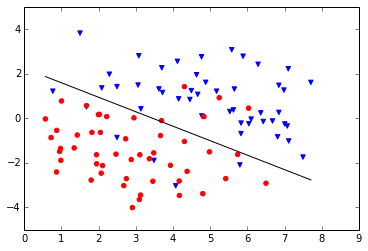

In [58]:
# plotting the graph
x1 = X[y == 1.0]
plt.scatter(x1[:, 1], x1[:, 2], marker='v', color='blue')
x0 = X[y == 0.0]
plt.scatter(x0[:,1], x0[:, 2], marker='o', color='red')

x_axis = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
y_axis = -(weights[0] + weights[1] * x_axis) / weights[2]
plt.plot(x_axis, y_axis, color='black')

#### Weighted Linear Regression using Normal equations